In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("./..")
sys.path.append(".")

In [6]:
# default libraries
import time
import datetime
import pickle
import pprint
from pathlib import Path
import math


# third party libraries
import torch
import torchvision
import torchvision.transforms as T
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from dotted_dict import DottedDict

# local imports
from effcn.models_multimnist import MultiMnistEffCapsNet
from effcn.functions import create_margin_loss
from effcn.utils import count_parameters
from datasets.multimnist import MultiMNist
from misc.optimizer import get_optimizer, get_scheduler


In [7]:
a = [1,2,3]

x,y,z = a

x

1

In [8]:
ds_train = MultiMNist(root='/mnt/data/datasets/multimnist_10',train=True, transform=None, generate=False)
ds_valid = MultiMNist(root='/mnt/data/datasets/multimnist_10',train=False, transform=None, generate=False)



In [54]:
dl_train = torch.utils.data.DataLoader(ds_train, 
                                    batch_size=8, 
                                    shuffle=False)

In [55]:
x,y,z,a,b = next(iter(dl_train))

In [56]:
#x,y,z,a,b =  ds_train[0]
#x2,y2,z2,a2,b2 =  ds_valid[0]

In [57]:
print(x.shape)
print(y.shape)
print(z.shape)
print(a.shape)
print(b.shape)

torch.Size([8, 1, 36, 36])
torch.Size([8])
torch.Size([8])
torch.Size([8, 1, 36, 36])
torch.Size([8, 1, 36, 36])


In [58]:
"""
# plot train imgs
x, y, z, a, b = next(iter(ds_train))
img = torchvision.utils.make_grid([x,a,b], nrow=8)
img = img.permute((1,2,0))
plt.imshow(img)
plt.show()
"""

'\n# plot train imgs\nx, y, z, a, b = next(iter(ds_train))\nimg = torchvision.utils.make_grid([x,a,b], nrow=8)\nimg = img.permute((1,2,0))\nplt.imshow(img)\nplt.show()\n'

AttributeError: 'Figure' object has no attribute 'close'

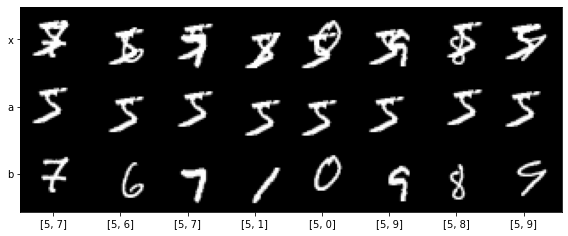

In [71]:

y_ticks = ["x", 'a', 'b']
x_ticks = torch.transpose(torch.cat((torch.unsqueeze(y,dim=0), torch.unsqueeze(z,dim=0)),dim=0), 0, 1).tolist()


img = torchvision.utils.make_grid(torch.cat([x,a,b], dim=0), nrow=x.shape[0])

#torch.cat([x,a,b], dim=0), nrow=x.shape[0])



#img = img.permute((1,2,0))

y_ticks = ["x", 'a', 'b']
x_ticks = torch.transpose(torch.cat((torch.unsqueeze(y,dim=0), torch.unsqueeze(z,dim=0)),dim=0), 0, 1).tolist()

fig, ax = plt.subplots()

ax.imshow(img.permute((1,2,0)))
ax.set_yticks((np.arange(len(y_ticks))*(x.shape[-1]+2)+(x.shape[-1]/2)), labels=y_ticks)
ax.set_xticks((np.arange(len(x_ticks))*(x.shape[-1]+2)+(x.shape[-1]/2)), labels=x_ticks)
fig.tight_layout()



fig.savefig("/mnt/data/experiments/EfficientCN/multimnist_overfit/img_valid_xx.png")
fig.close()

In [60]:
torch.transpose(torch.cat((torch.unsqueeze(y,dim=0), torch.unsqueeze(z,dim=0)),dim=0), 0, 1).tolist()


[[5, 7], [5, 6], [5, 7], [5, 1], [5, 0], [5, 9], [5, 8], [5, 9]]

In [61]:
x.shape[1]

1

In [62]:
np.arange(len(y_ticks))*x.shape[1]

array([0, 1, 2])

In [63]:
np.arange(len(x_ticks))*x.shape[-1]+(x.shape[-1]/2)

array([ 18.,  54.,  90., 126., 162., 198., 234., 270.])

In [64]:
x.shape[-1]

36

In [65]:
print(torch.cat([x,a,b], dim=0).shape)

print(img.shape)

torch.Size([24, 1, 36, 36])
torch.Size([116, 306, 3])


In [66]:
116-4*36

(154/4)-36

2.5